In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

Dataset URL: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
License(s): CC0-1.0
100% 184M/185M [00:09<00:00, 23.9MB/s]
100% 185M/185M [00:09<00:00, 19.6MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/az-handwritten-alphabets-in-csv-format.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
df = pd.read_csv('/content/A_Z Handwritten Data.csv')

In [19]:
seed = random.randint(0,100)
i = 100000
temp = df.sample(i, random_state = seed).to_numpy()

In [20]:
X = temp[:,1:]
y = temp[:,0:1]
X = X.reshape(i, 28,28,1)

[20]


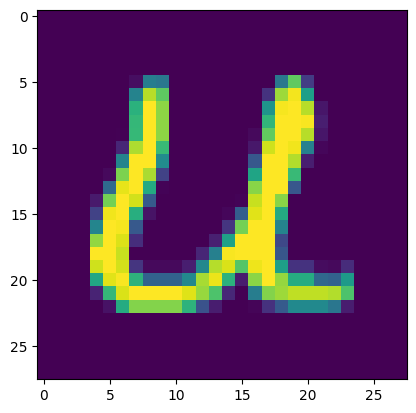

In [21]:
i = 5
plt.imshow(X[i])
print(y[i])

In [22]:
model = Sequential()

#layer 1
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding ='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding ='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#layer2
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#layer3
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))


In [23]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                 

In [25]:
history = model.fit(X,y, epochs = 10, validation_split = 0.25)

Epoch 1/10
2344/2344 [==============================] - 56s 23ms/step - loss: 1.1389 - accuracy: 0.6697 - val_loss: 0.2815 - val_accuracy: 0.9369
Epoch 2/10
2344/2344 [==============================] - 47s 20ms/step - loss: 0.3826 - accuracy: 0.8926 - val_loss: 0.1237 - val_accuracy: 0.9706
Epoch 3/10
2344/2344 [==============================] - 49s 21ms/step - loss: 0.2868 - accuracy: 0.9231 - val_loss: 0.1296 - val_accuracy: 0.9691
Epoch 4/10
2344/2344 [==============================] - 46s 20ms/step - loss: 0.2382 - accuracy: 0.9377 - val_loss: 0.1279 - val_accuracy: 0.9745
Epoch 5/10
2344/2344 [==============================] - 48s 20ms/step - loss: 0.2072 - accuracy: 0.9492 - val_loss: 0.1700 - val_accuracy: 0.9690
Epoch 6/10
2344/2344 [==============================] - 48s 20ms/step - loss: 0.1730 - accuracy: 0.9576 - val_loss: 0.1125 - val_accuracy: 0.9782
Epoch 7/10
2344/2344 [==============================] - 47s 20ms/step - loss: 0.1695 - accuracy: 0.9593 - val_loss: 0.1521 -

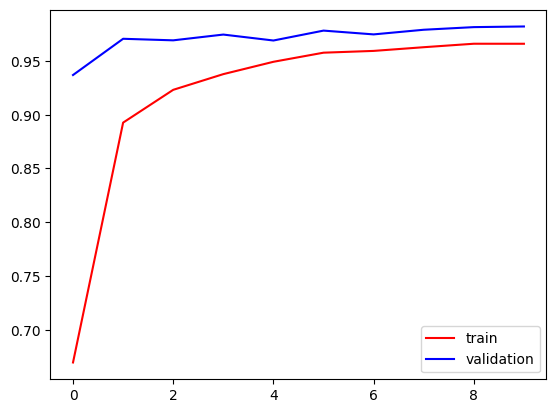

In [26]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

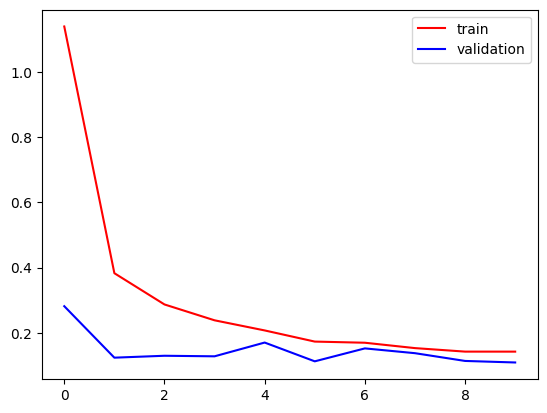

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [28]:
seed = random.randint(0,100)
temp = df.sample(n = 10000, random_state = seed)
X = temp.to_numpy()[:,1:]
y = temp.to_numpy()[:,0:1]
X = X.reshape(10000,28,28,1)

In [29]:
y_pred = model.predict(X)
y_pred = np.argmax(y_pred, axis = 1)
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)


313/313 [==============================] - 2s 7ms/step


0.9836

In [30]:
model.save('/content/alphabet_recognition.keras')

In [31]:
model = tf.keras.models.load_model('/content/alphabet_recognition.keras')

In [32]:
y_pred = model.predict(X)
y_pred = np.argmax(y_pred, axis = 1)
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)


313/313 [==============================] - 2s 5ms/step


0.9836